In [ ]:
!pip install scanpy

In [ ]:
!pip install leidenalg

# **Data**
For this tutorial, we analyze a dataset of Peripheral Blood Mononuclear Cells (PBMC) extracted from a healthy donor, freely available from 10X Genomics. The dataset contains 2,700 single cells sequenced using Illumina NextSeq 500. The raw sequences have been processed by the cellranger pipeline from 10X to extract a unique molecular identifier (UMI) count matrix.

In this matrix, the values represent the number for each feature (i.e. gene; row) that are detected in each cell (column). Such matrices can be quite large, where here there are 2,700 columns with 32,738 lines, with mostly zero values, i.e. an extremely sparse matrix. To optimize the storage of such a table and the information about the genes and cells, cellranger creates 3 files:

- `genes.tsv`: a tabular file with information about the 32,738 genes in 2 columns (Ensembl gene id and the gene symbol)
- `barcodes.tsv`: a tabular file with the barcode for each of the 2,700 cells
- `matrix.mtx`: a condensed version of the count matrix

*Source : https://scanpy-tutorials.readthedocs.io/en/latest/pbmc3k.html*

In [1]:
import scanpy as sc
import pandas as pd
import seaborn as sns
import scipy.sparse as sparse
import warnings
warnings.filterwarnings('ignore')

In [2]:
sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()
sc.settings.set_figure_params(dpi=80, facecolor='white')

scanpy==1.9.1 anndata==0.8.0 umap==0.5.3 numpy==1.21.6 scipy==1.5.3 pandas==1.4.3 scikit-learn==1.0.2 statsmodels==0.13.2 python-igraph==0.9.11 louvain==0.7.1 pynndescent==0.5.4


In [3]:
# For linux system
# !mkdir data
# !wget http://cf.10xgenomics.com/samples/cell-exp/1.1.0/pbmc3k/pbmc3k_filtered_gene_bc_matrices.tar.gz -O data/pbmc3k_filtered_gene_bc_matrices.tar.gz
# !cd data; tar -xzf pbmc3k_filtered_gene_bc_matrices.tar.gz
# !mkdir write

In [ ]:
# read the count data into an anndata object which is a matrix
adata = sc.read_10x_mtx(
    '/home/Documents/pbmc3k_filtered_gene_bc_matrices/filtered_gene_bc_matrices/hg19',  # the directory with the `.mtx` file
    var_names='gene_symbols',                # use gene symbols for the variable names (variables-axis index)
    cache=True) 

**This function reads the data in:**
* `barcodes.tsv` into `anndata.obs` object
* `genes.tsv` into `anndata.var` object
* `matrix.mtx` into `anndata.X` object

In [5]:
adata

AnnData object with n_obs × n_vars = 2700 × 32738
    var: 'gene_ids'

In [6]:
adata.obs # this has the cellular barcodes; the observations

Empty DataFrame
Columns: []
Index: [AAACATACAACCAC-1, AAACATTGAGCTAC-1, AAACATTGATCAGC-1, AAACCGTGCTTCCG-1, AAACCGTGTATGCG-1, AAACGCACTGGTAC-1, AAACGCTGACCAGT-1, AAACGCTGGTTCTT-1, AAACGCTGTAGCCA-1, AAACGCTGTTTCTG-1, AAACTTGAAAAACG-1, AAACTTGATCCAGA-1, AAAGAGACGAGATA-1, AAAGAGACGCGAGA-1, AAAGAGACGGACTT-1, AAAGAGACGGCATT-1, AAAGATCTGGGCAA-1, AAAGCAGAAGCCAT-1, AAAGCAGATATCGG-1, AAAGCCTGTATGCG-1, AAAGGCCTGTCTAG-1, AAAGTTTGATCACG-1, AAAGTTTGGGGTGA-1, AAAGTTTGTAGAGA-1, AAAGTTTGTAGCGT-1, AAATCAACAATGCC-1, AAATCAACACCAGT-1, AAATCAACCAGGAG-1, AAATCAACCCTATT-1, AAATCAACGGAAGC-1, AAATCAACTCGCAA-1, AAATCATGACCACA-1, AAATCCCTCCACAA-1, AAATCCCTGCTATG-1, AAATGTTGAACGAA-1, AAATGTTGCCACAA-1, AAATGTTGTGGCAT-1, AAATTCGAAGGTTC-1, AAATTCGAATCACG-1, AAATTCGAGCTGAT-1, AAATTCGAGGAGTG-1, AAATTCGATTCTCA-1, AAATTGACACGACT-1, AAATTGACTCGCTC-1, AACAAACTCATTTC-1, AACAAACTTTCGTT-1, AACAATACGACGAG-1, AACACGTGCAGAGG-1, AACACGTGGAAAGT-1, AACACGTGGAACCT-1, AACACGTGGCTACA-1, AACACGTGTACGAC-1, AACAGCACAAGAGT-1, AACATTGATGGGAG-1, AACCAGTGATACCG-1, AACCCAGATCGCTC-1, AACCGATGCTCCCA-1, AACCGATGGTCATG-1, AACCGATGTTCTAC-1, AACCGCCTAGCGTT-1, AACCGCCTCTACGA-1, AACCTACTGTGAGG-1, AACCTACTGTGTTG-1, AACCTTACGAGACG-1, AACCTTACGCGAGA-1, AACCTTACTAACGC-1, AACCTTTGGACGGA-1, AACCTTTGTACGCA-1, AACGCAACAAGTAG-1, AACGCATGACCCAA-1, AACGCATGCCTTCG-1, AACGCATGTACTTC-1, AACGCCCTCGGGAA-1, AACGCCCTCGTACA-1, AACGCCCTGCTTAG-1, AACGCCCTGGCATT-1, AACGTCGAGTATCG-1, AACGTGTGAAAGCA-1, AACGTGTGGCGGAA-1, AACGTGTGTCCAAG-1, AACGTGTGTGCTTT-1, AACTACCTTAGAGA-1, AACTCACTCAAGCT-1, AACTCACTTGGAGG-1, AACTCGGAAAGTGA-1, AACTCGGAAGGTCT-1, AACTCTTGCAGGAG-1, AACTGTCTCCCTTG-1, AACTTGCTACGCTA-1, AACTTGCTGGGACA-1, AAGAACGAGTGTTG-1, AAGAAGACGTAGGG-1, AAGACAGAAGTCTG-1, AAGACAGAGGATCT-1, AAGACAGATTACCT-1, AAGAGATGGGTAGG-1, AAGATGGAAAACAG-1, AAGATGGAGAACTC-1, AAGATGGAGATAAG-1, AAGATTACAACCTG-1, ...]

[2700 rows x 0 columns]

In [7]:
adata.var   # this has the gene names (index) and gene id information; the variables

gene_ids
MIR1302-10    ENSG00000243485
FAM138A       ENSG00000237613
OR4F5         ENSG00000186092
RP11-34P13.7  ENSG00000238009
RP11-34P13.8  ENSG00000239945
...                       ...
AC145205.1    ENSG00000215635
BAGE5         ENSG00000268590
CU459201.1    ENSG00000251180
AC002321.2    ENSG00000215616
AC002321.1    ENSG00000215611

[32738 rows x 1 columns]

In [8]:
adata.X     # and this has the UMI count matrix (the gene expression matrix)

<2700x32738 sparse matrix of type '<class 'numpy.float32'>'
	with 2286884 stored elements in Compressed Sparse Row format>

In [9]:
adata.X.toarray()     # converting the sparse matrix to nd array to visualise it

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [10]:
adata.X.min(), adata.X.max() # minimum and maximum number of UMI count (representing gene expression) in the matrix

(0.0, 419.0)

In [11]:
# this is unnecessary if using `var_names='gene_ids'` in `sc.read_10x_mtx` since gene ids are already unique
# but here since we are using `var_names='gene_symbols'` , we need to make them unique
adata.var_names_make_unique()     

### Modules used
`sc.pp` - module for preprocessing of the data, pp module includes functions that perform transformations on the data

`sc.tl` - the tool module includes functions that do not transform the data but add some annotations into the data matrix, which can then be visualised using the plotting functions

`sc.pl` - plotting module includes functions that give visualisations

# 1.Pre-Processing
* __Before going for downstream analysis, it is crucial to ensure that all the cellular barcode data obtained from scRNA-seq correspond to viable cells.__

normalizing counts per cell
    finished (0:00:00)


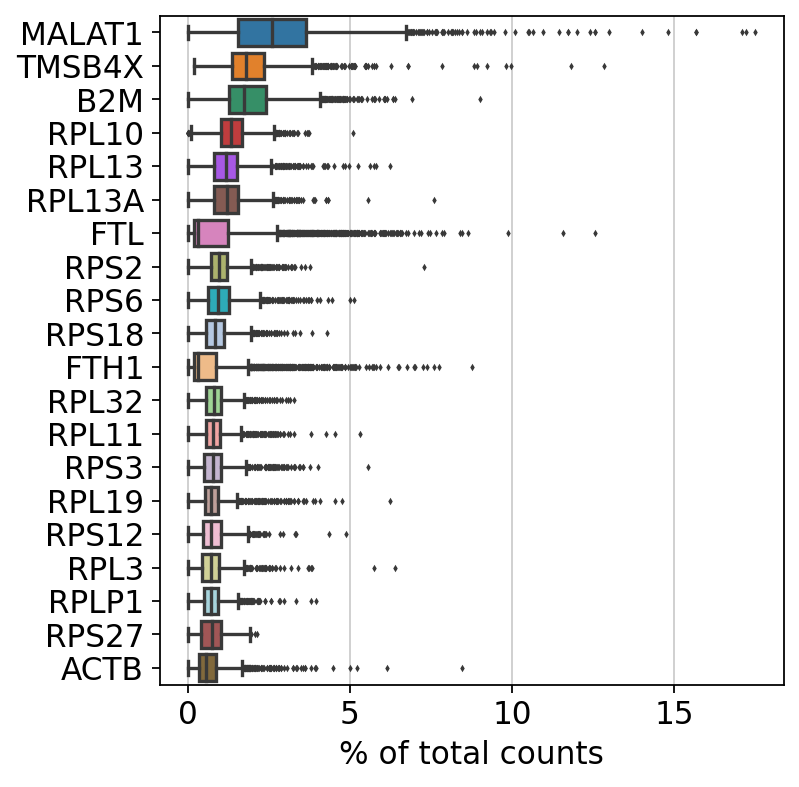

In [12]:
# Show those genes that yield the highest fraction of counts in each single cell, across all cells.
sc.pl.highest_expr_genes(adata, n_top=20, )  # shows top 20 most expressed genes.

## 1.1 Quality Control : Basic filtering:

__1.1.1 Outliers__                                                              

In [13]:
# get rid of cells with fewer than 200 genes (the rows or cells which express < 200 genes)
sc.pp.filter_cells(adata, min_genes=200) 
# get rid of genes that are found in fewer than 3 cells(the columns or genes that are expressing in < 3 cells)
sc.pp.filter_genes(adata, min_cells=3)  

filtered out 19024 genes that are detected in less than 3 cells


In [14]:
adata

AnnData object with n_obs × n_vars = 2700 × 13714
    obs: 'n_genes'
    var: 'gene_ids', 'n_cells'

In [15]:
# filtering out the cells that show high expression of mitochondrial genes
# High proportions are indicative of poor-quality cells or non viable cells
# possibly because of loss of cytoplasmic RNA from perforated cells but mitochondria being larger is retained.

# we annotate the group of mitochondrial genes as 'mt'
adata.var['mt'] = adata.var_names.str.startswith('MT-')  
# quality metrices are calculated to determine the outlier cells. 
# Low quality cells can then be removed by setting appropriate thresholds.
sc.pp.calculate_qc_metrics(adata, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)  

In [16]:
adata

AnnData object with n_obs × n_vars = 2700 × 13714
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'gene_ids', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'

In [17]:
adata.var

gene_ids  n_cells     mt  n_cells_by_counts  \
AL627309.1     ENSG00000237683        9  False                  9   
AP006222.2     ENSG00000228463        3  False                  3   
RP11-206L10.2  ENSG00000228327        5  False                  5   
RP11-206L10.9  ENSG00000237491        3  False                  3   
LINC00115      ENSG00000225880       18  False                 18   
...                        ...      ...    ...                ...   
AC145212.1     ENSG00000215750       16  False                 16   
AL592183.1     ENSG00000220023      323  False                323   
AL354822.1     ENSG00000215615        8  False                  8   
PNRC2-1        ENSG00000215700      110  False                110   
SRSF10-1       ENSG00000215699       69  False                 69   

               mean_counts  pct_dropout_by_counts  total_counts  
AL627309.1        0.003333              99.666667           9.0  
AP006222.2        0.001111              99.888889           3.0  
RP11-206L10.2     0.001852              99.814815           5.0  
RP11-206L10.9     0.001111              99.888889           3.0  
LINC00115         0.006667              99.333333          18.0  
...                    ...                    ...           ...  
AC145212.1        0.006667              99.407407          18.0  
AL592183.1        0.134815              88.037037         364.0  
AL354822.1        0.002963              99.703704           8.0  
PNRC2-1           0.042963              95.925926         116.0  
SRSF10-1          0.025926              97.444444          70.0  

[13714 rows x 7 columns]

A violin plot of some of the computed quality measures:
* the number of genes expressed in the count matrix
* the total UMI counts per cell
* the percentage of counts in mitochondrial genes

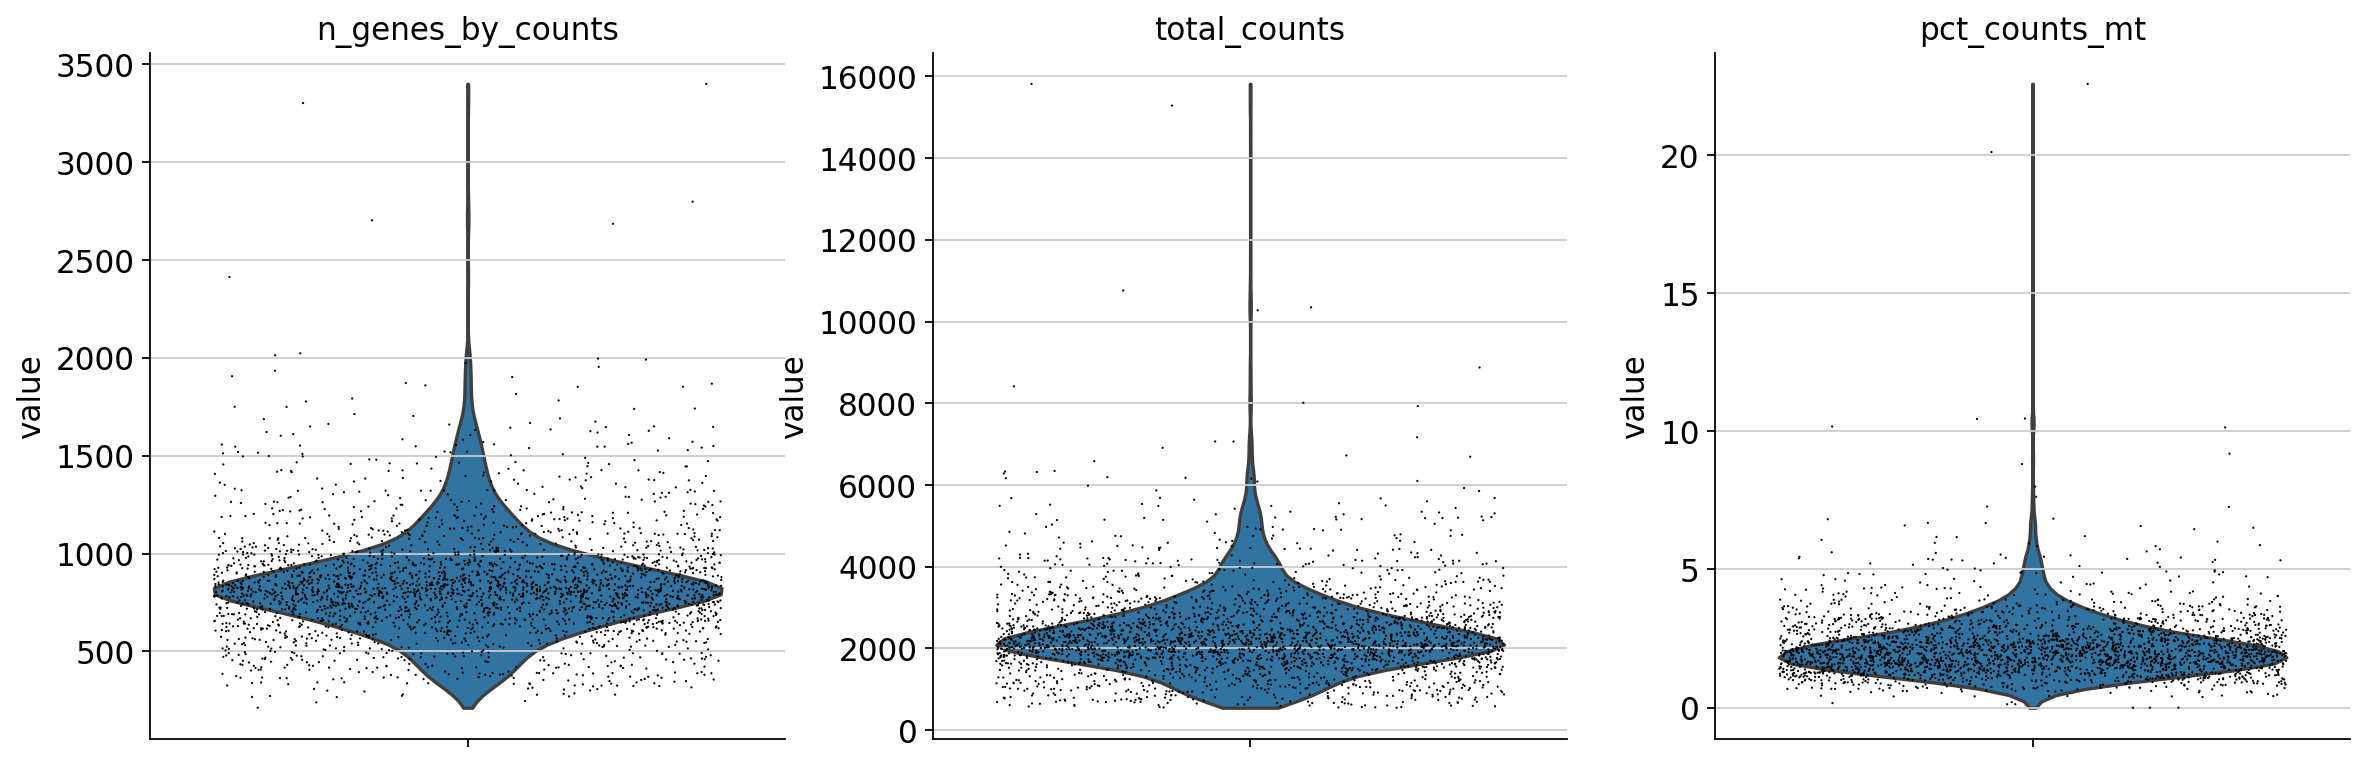

In [18]:
sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'], jitter=0.4, multi_panel=True)

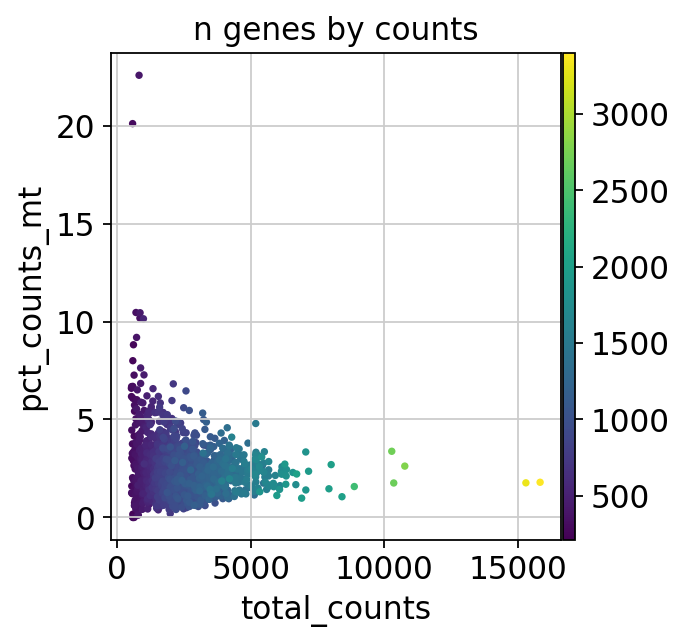

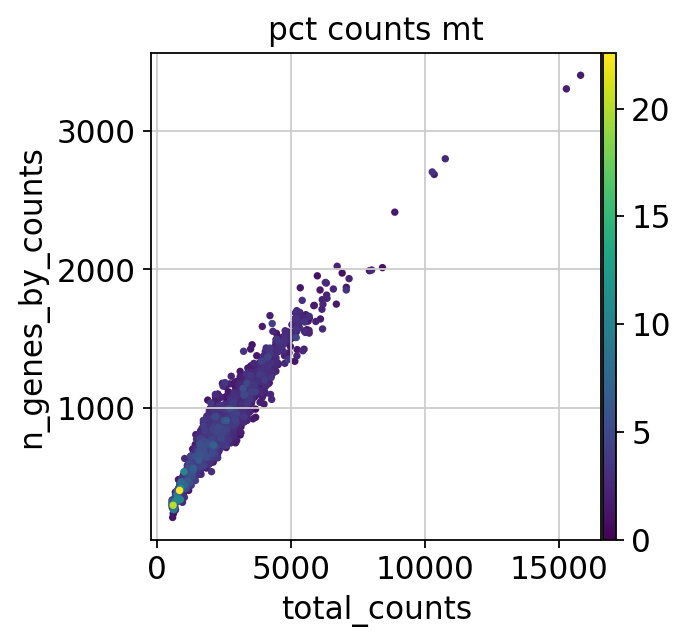

In [19]:
# visualise the quality metrices in order to visually identify the upper limits and the lower limits.
# here we are considering two quality measures, pct_counts_mt and n_genes_by_counts
sc.pl.scatter(adata, x='total_counts', y='pct_counts_mt', color='n_genes_by_counts')
sc.pl.scatter(adata, x='total_counts', y='n_genes_by_counts', color='pct_counts_mt')

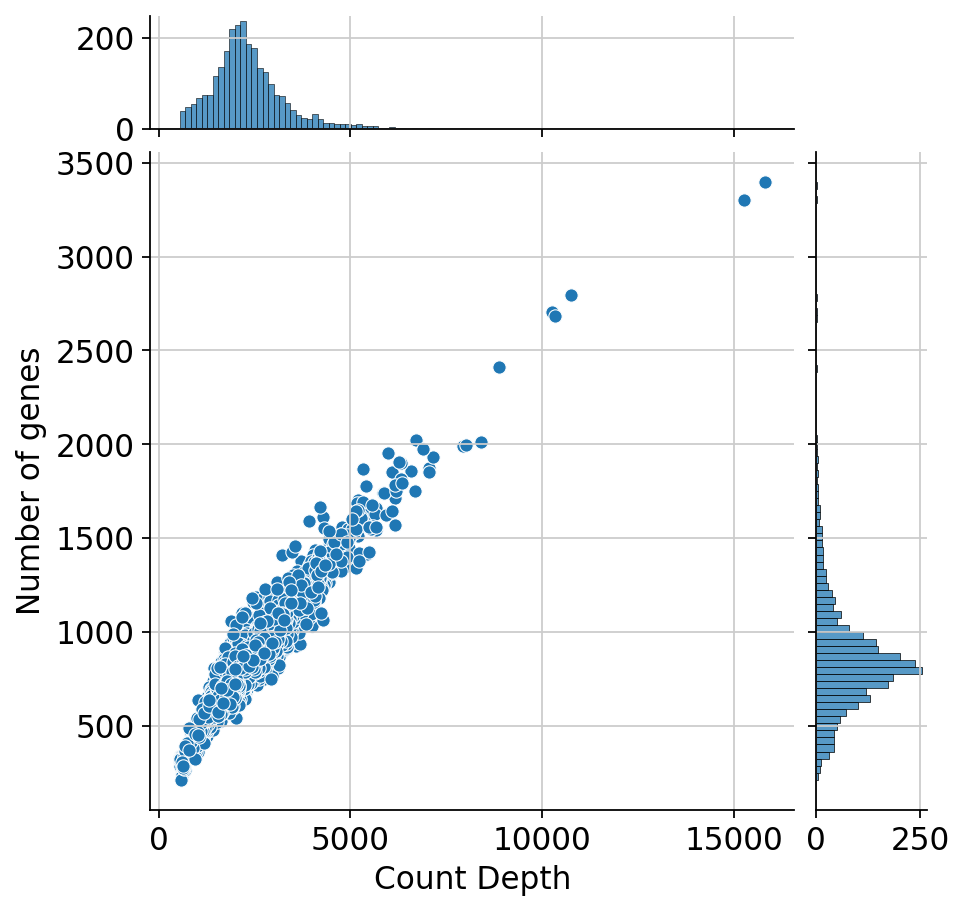

In [20]:
jnpl = sns.jointplot(
    data=adata.obs,
    x='total_counts',
    y='n_genes_by_counts',
    kind='scatter',
    marginal_ticks=True
)
jnpl.set_axis_labels('Count Depth','Number of genes')

__1.1.2. Remove cells that have:__
1. too many or too low total counts:
> low or high count-depth are indicative of quiescent/damaged cells or doublets/multiplets respectively
2. large fraction of mitochondrial genes :
> Elevated levels of mitochondrial genes (above 5-10%) in a cell is an indication that the cell may have broken and the cytoplasmic mRNA content may have leaked.

In [21]:
# Actually do the filtering by slicing the AnnData object.
adata = adata[adata.obs.n_genes_by_counts < 2500, :]   # taking cells expressing less than 2500 genes
adata = adata[adata.obs.pct_counts_mt < 5, :]    # taking cells expressing less than 5% mitochondrial genes.

### After QC


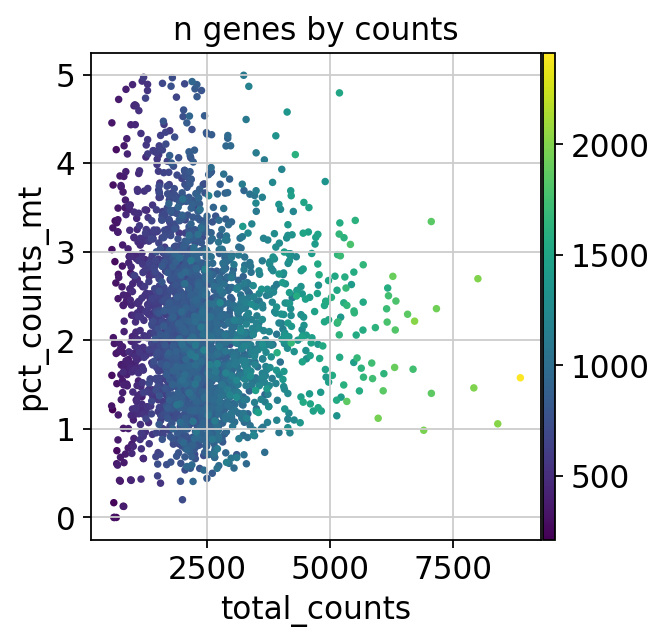

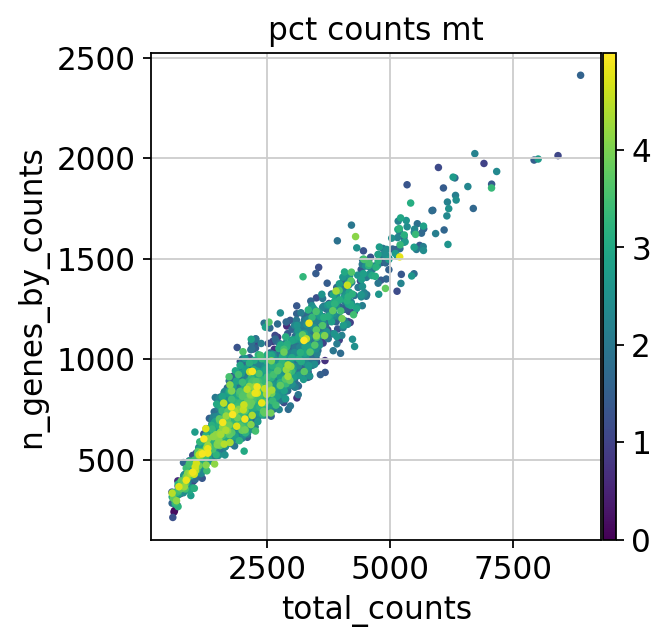

In [22]:
sc.pl.scatter(adata, x='total_counts', y='pct_counts_mt', color='n_genes_by_counts')
sc.pl.scatter(adata, x='total_counts', y='n_genes_by_counts', color='pct_counts_mt')

## 1.2 Normalization
**Total-count normalize (library-size correct) the data matrix X to 10,000 reads per cell/ UMI, so that counts become comparable among cells.**
* cell level(counts comparable between cells) and gene level(counts comparable between genes) normalisation is carried out to cater to sampling effects or technical biases that remain in the data due to variablility in the protocols.

In [23]:
adata.X

<2638x13714 sparse matrix of type '<class 'numpy.float32'>'
	with 2238732 stored elements in Compressed Sparse Row format>

In [24]:
adata.X[0,:] #selecting the entire first row (cell/barcode)

<1x13714 sparse matrix of type '<class 'numpy.float32'>'
	with 779 stored elements in Compressed Sparse Row format>

In [25]:
# checking the total UMI count for the first cell/barcodem prior to cell count normalisation
# initially it is 2419
adata.X[0,:].sum()

2419.0

In [26]:
# also checking it for the second cell/barcode
adata.X[1,:].sum()

4903.0

In [27]:
# doing normalization
sc.pp.normalize_total(adata, target_sum=1e4)

normalizing counts per cell
    finished (0:00:00)


In [28]:
# after normalisation, the total UMI count is approx. 10000
adata.X[0,:].sum()

9999.966

In [29]:
# for the second cell also it is 10000 now
adata.X[1,:].sum()

10000.049

## 1.3 Log transformation
**Change normalised UMI counts (CPM) to log counts**

Post normalisation, log(x+1) transformed count matrices are obtained that give a simplified account of expression levels in terms of log-fold changes and bring down the skewness of the data.

In [30]:
sc.pp.log1p(adata)  
# since the function highly_variable_genes expects data in logarithmised form hence we need to logarithmise the data.

## 1.4 Feature Selection 

In [31]:
# find the highly variable genes
# the function adds a column called highly variable in the adata.var dataframe
# This column will have True values for highly variable genes and False for genes that aren't very variable.

sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)

extracting highly variable genes
    finished (0:00:00)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


In [32]:
adata

AnnData object with n_obs × n_vars = 2638 × 13714
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'gene_ids', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'log1p', 'hvg'

In [33]:
adata.var['highly_variable']

AL627309.1       False
AP006222.2       False
RP11-206L10.2    False
RP11-206L10.9    False
LINC00115        False
                 ...  
AC145212.1       False
AL592183.1       False
AL354822.1       False
PNRC2-1          False
SRSF10-1         False
Name: highly_variable, Length: 13714, dtype: bool

In [34]:
adata.var['highly_variable'].value_counts()  # so there are only 1838 genes which are highly variable in their expression

False    11876
True      1838
Name: highly_variable, dtype: int64

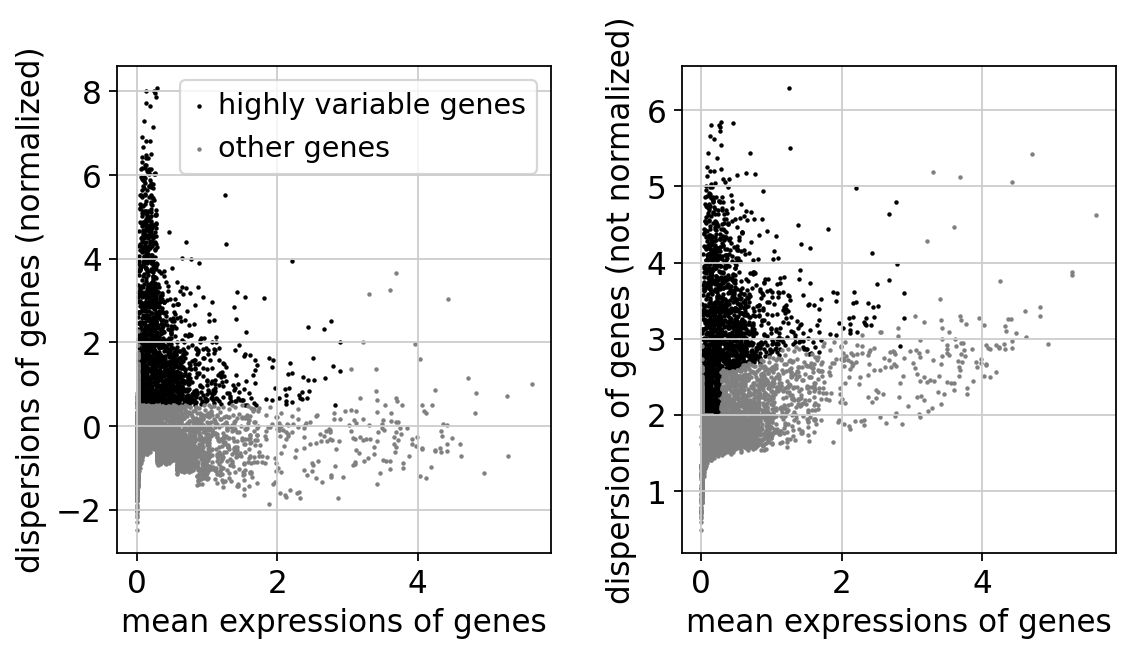

In [35]:
sc.pl.highly_variable_genes(adata)

Set the `.raw` attribute of the AnnData object to the normalized and logarithmized raw gene expression for later use in **differential testing and visualizations of gene expression**. This simply freezes the state of the AnnData object.

We can then get back an AnnData of the object in `.raw` (i.e., the adata.raw) by calling `.raw.to_adata()` at any point .

In [36]:
# save the raw data before processing values and further filtering
adata.raw = adata

In [37]:
# now we will filter out the highly variable genes
adata = adata[:, adata.var.highly_variable]

In [38]:
adata   # we are now left with 1838 genes/features only

View of AnnData object with n_obs × n_vars = 2638 × 1838
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'gene_ids', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'log1p', 'hvg'

In [39]:
adata.raw.X  # but here we see the .raw object still retains all the 13714 genes

<2638x13714 sparse matrix of type '<class 'numpy.float32'>'
	with 2238732 stored elements in Compressed Sparse Row format>

In [40]:
# Regress out effects of total counts per cell and the percentage of mitochondrial genes expressed. 
sc.pp.regress_out(adata, ['total_counts', 'pct_counts_mt'])

regressing out ['total_counts', 'pct_counts_mt']
    sparse input is densified and may lead to high memory use
    finished (0:00:03)


In [41]:
# scale the data to unit variance 
# Clip values exceeding standard deviation 10.
# a very important step before pca
sc.pp.scale(adata, max_value=10)

## 1.5 Dimensionality Reduction using Principle Component Analysis
Reduce the dimensionality of the data by running principal component analysis (PCA), which reveals the main axes of variation and denoises the data.

In [42]:
# next calculate the PCA
sc.tl.pca(adata)

computing PCA
    on highly variable genes
    with n_comps=50
    finished (0:00:00)


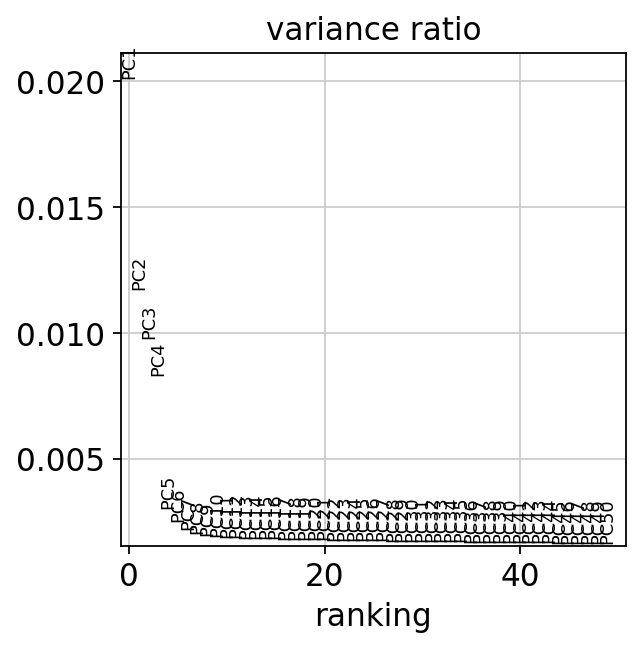

In [43]:
# We can plot the above to show how the PCs are contributing to the variance
# we can use the plot to decide how many PCs to pick to compute the neighborhood relations of cells
# ideally we pick the PCs when the curve starts flattening out
sc.pl.pca_variance_ratio(adata, log=False, n_pcs=50)

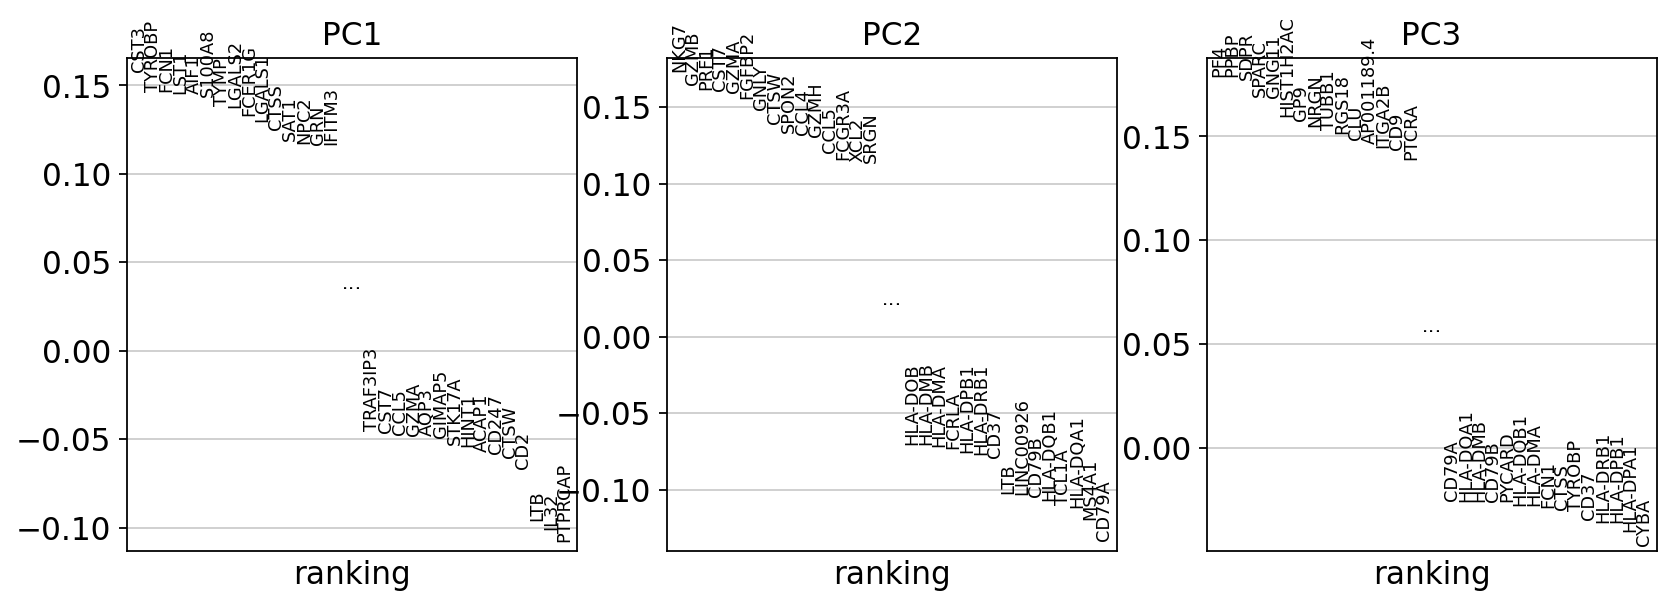

In [44]:
sc.pl.pca_loadings(adata)

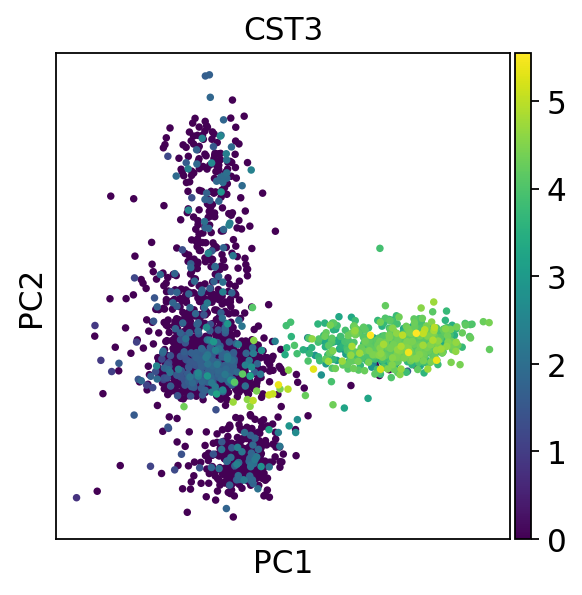

In [45]:
sc.pl.pca(adata, color='CST3')

So, what the above pca step has helped us with is that it has given us a scree plot, looking at which we can decide upon the number of dimensions (pcs) we want to use.

## 1.6 Visualisation

### Computing the neighborhood graph

Let us compute the neighborhood graph of cells using the PCA representation of the data matrix.
* In our experience, often a rough estimate of the number of PCs does fine.

In [46]:
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=40)  # passing the number of pc's observed from the above graph into the n_pcs parameter

computing neighbors
    using 'X_pca' with n_pcs = 40
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:01)


### Embedding the neighborhood graph
* Using UMAP is recommended over using tSNE since it is better at preserving the global neighborhood structure. 
* In some ocassions, you might still observe disconnected clusters and similar connectivity violations. They can usually be remedied by running UMAP together with PAGA(Partition based graph abstraction), this is because PAGA produces coarse-grained visualisations which can simplify the interpretation of sc data especially with large number of cells.
> Therefore for complex dataset visualisations, PAGA is used with UMAP.

In [47]:
sc.tl.umap(adata)

computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:02)


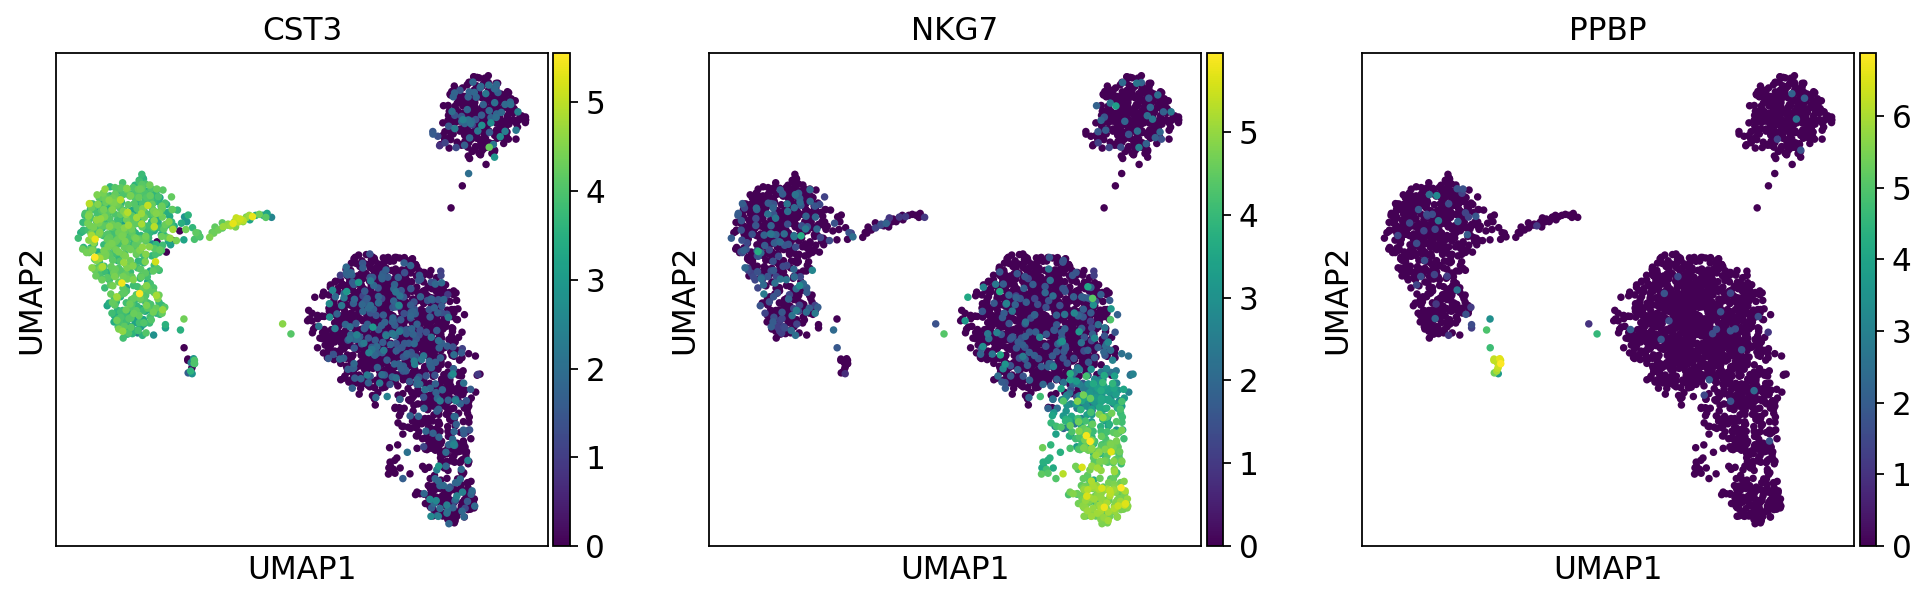

In [48]:
sc.pl.umap(adata, color=['CST3', 'NKG7', 'PPBP'])

# 2. Downstream analysis
## 2.1 Cluster Analysis
### 2.1.1 Clustering the neighborhood graph
As mentioned earlier, Cell clusters that we achieve by embedding the neighborhood graph using UMAP aren't very reliable since it introduces a lot of topological distorsion into the data (distort the neighborhood structure)

and hence we go for Graph based clustering methods like Leiden algorithm.

In [49]:
sc.tl.leiden(adata, resolution=0.95)   

running Leiden clustering
    finished: found 8 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:00)


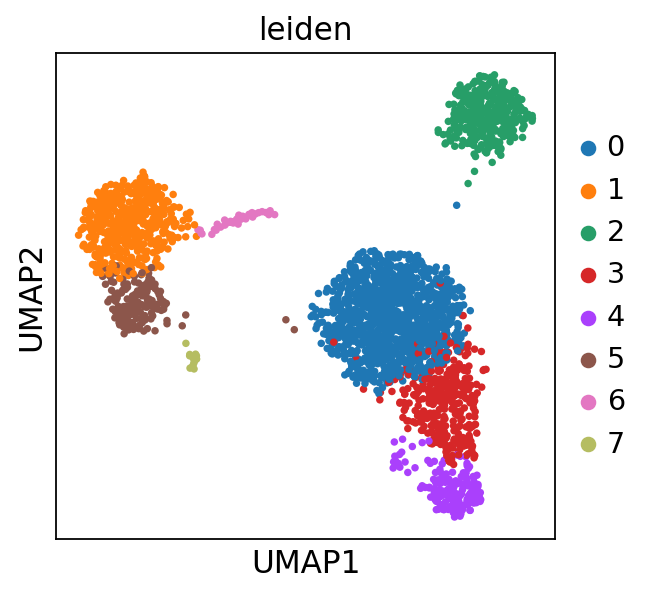

In [50]:
sc.pl.umap(adata, color=['leiden'])

### 2.1.2 Finding the marker genes ; Studying Differential gene expression in the clusters

In order to find the marker genes expressed in each of the clusters we need to first rank the genes expressed in each cluster in order of their mean expression. We are essentially studying the differential gene expression among the clusters.

ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:00)


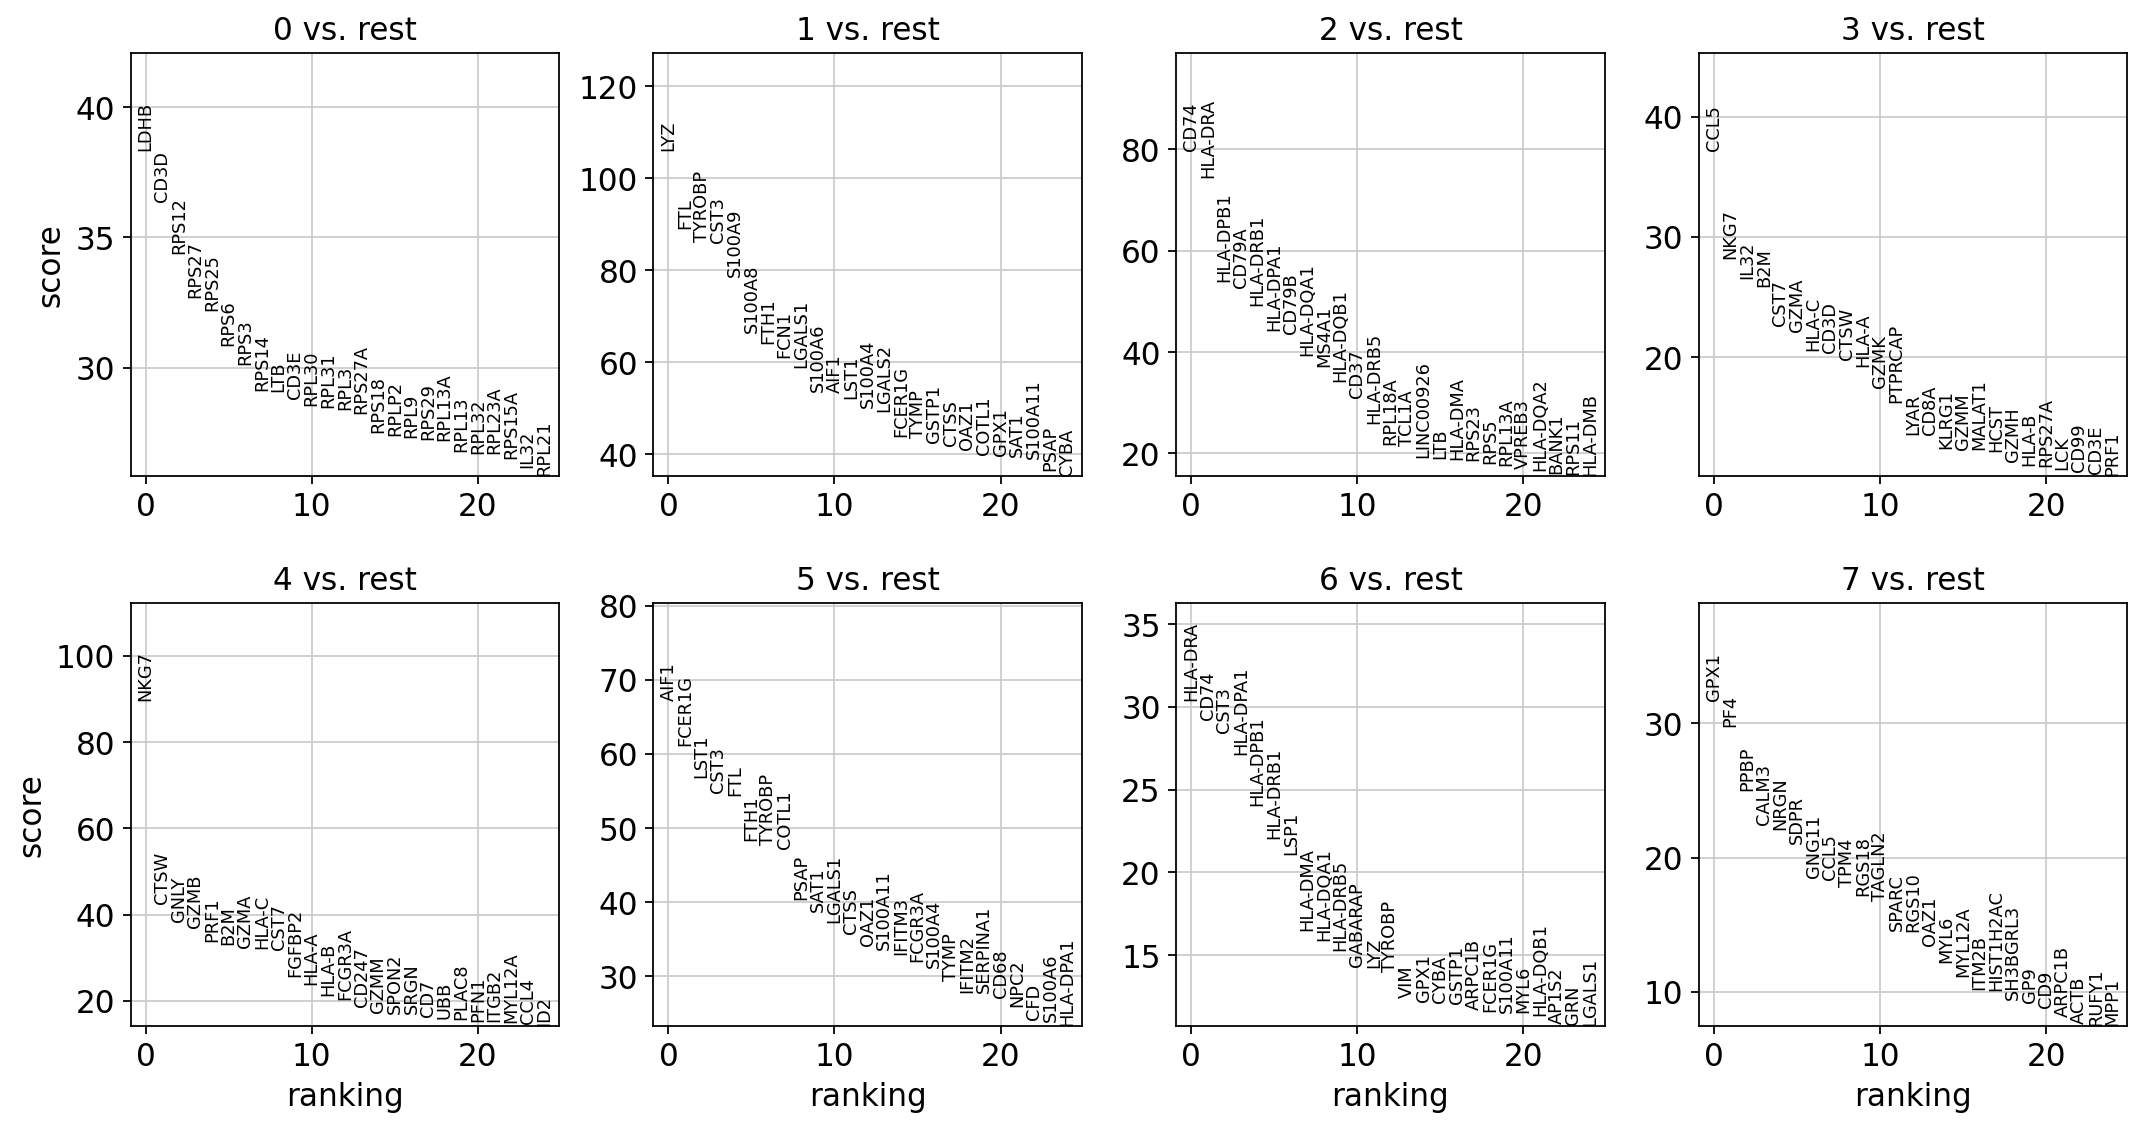

In [51]:
# we use statistical tests to rank the mean expression of the genes in each cluster
# here we are using t-test since this is the simplest and the fastest method.
sc.tl.rank_genes_groups(adata, 'leiden', method='t-test')
sc.pl.rank_genes_groups(adata, n_genes=25, sharey=False)

ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:01)


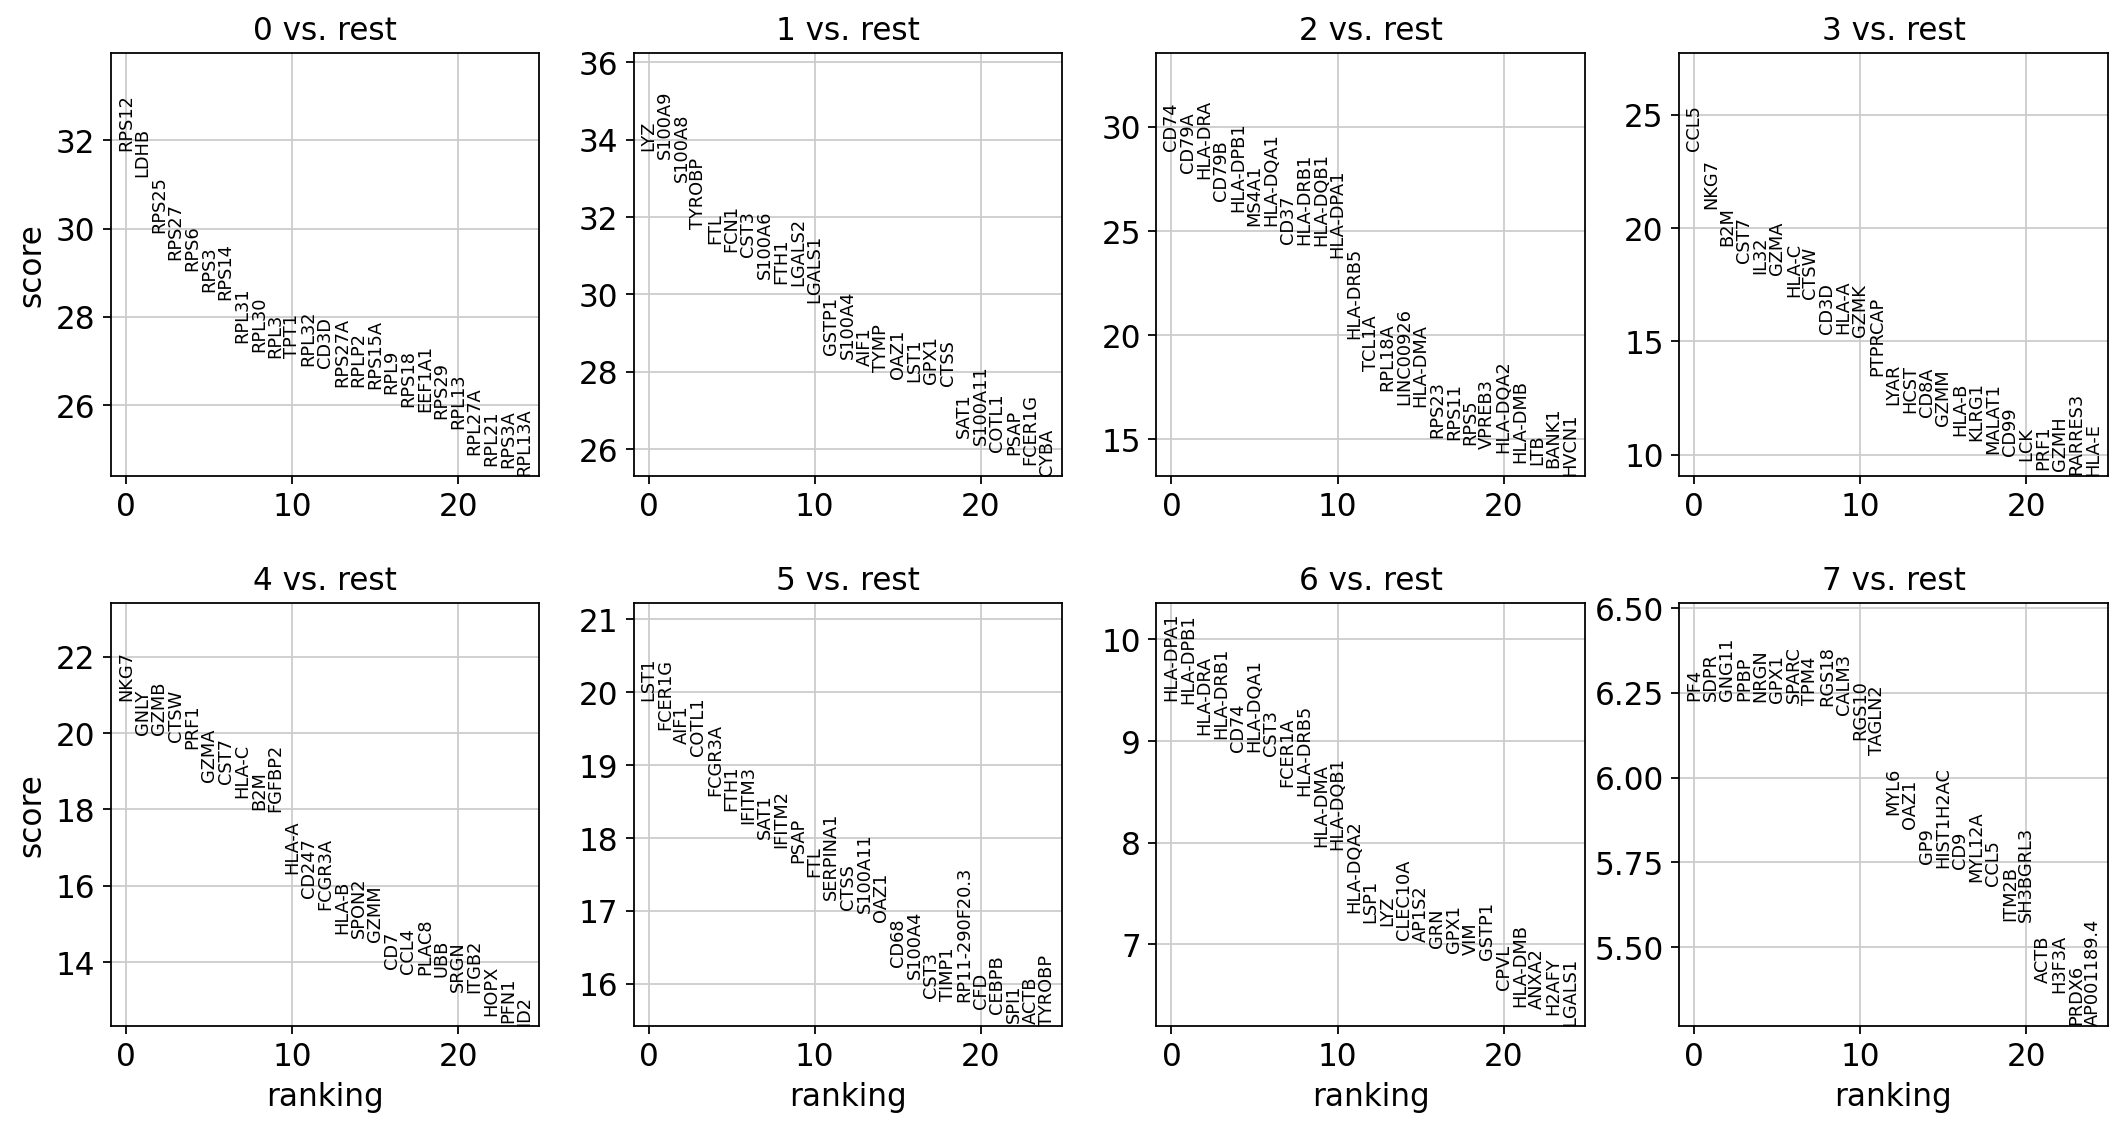

In [52]:
# here we are using the wilcoxon-rank-sum test
# it is more robust as compared to t-test since it corrects for false discovery rates.
sc.tl.rank_genes_groups(adata, 'leiden', method='wilcoxon')
sc.pl.rank_genes_groups(adata, n_genes=25, sharey=False)

In [53]:
len(adata.uns['rank_genes_groups']['names']['0']) 

13714

Since the gene ranking by default uses the raw adata, which hasn't undergone feature selection and dimensionality reduction, hence here we see that 13714 genes have been considered in all the clusters. Also, the rank_genes_groups function adds the rank gene information in the form of a dict of dict into the adata.uns object. We can simply access the outer key 'rank_genes_groups', and then further access the key 'names' and then within this key, further access the name of the cluster (example: '0') and we will see the list of all the genes stored as the value in the key '0'

In [54]:
# the names dictionary can simply be made into a pandas dataframe then
pd.DataFrame(adata.uns['rank_genes_groups']['names']).head(5)

0       1         2     3     4       5         6      7
0  RPS12     LYZ      CD74  CCL5  NKG7    LST1  HLA-DPA1    PF4
1   LDHB  S100A9     CD79A  NKG7  GNLY  FCER1G  HLA-DPB1   SDPR
2  RPS25  S100A8   HLA-DRA   B2M  GZMB    AIF1   HLA-DRA  GNG11
3  RPS27  TYROBP     CD79B  CST7  CTSW   COTL1  HLA-DRB1   PPBP
4   RPS6     FTL  HLA-DPB1  IL32  PRF1  FCGR3A      CD74   NRGN

In [55]:
result = adata.uns['rank_genes_groups']
groups = result['names'].dtype.names
pd.DataFrame(
    {group + '_' + key[:1]: result[key][group]
    for group in groups for key in ['names', 'pvals']}).head(5)

0_n            0_p     1_n            1_p       2_n            2_p   3_n  \
0  RPS12  1.607962e-221     LYZ  2.844372e-249      CD74  2.487145e-183  CCL5   
1   LDHB  1.454253e-213  S100A9  2.654880e-246     CD79A  1.679730e-170  NKG7   
2  RPS25  1.601477e-196  S100A8  8.731315e-238   HLA-DRA  6.942399e-167   B2M   
3  RPS27  1.145754e-188  TYROBP  9.799314e-221     CD79B  2.569135e-154  CST7   
4   RPS6  1.338546e-185     FTL  3.676035e-215  HLA-DPB1  3.580735e-148  IL32   

             3_p   4_n           4_p     5_n           5_p       6_n  \
0  1.978393e-121  NKG7  1.203971e-96    LST1  4.980059e-88  HLA-DPA1   
1   1.278790e-96  GNLY  1.257170e-88  FCER1G  1.449472e-84  HLA-DPB1   
2   1.421882e-82  GZMB  1.429027e-88    AIF1  5.839647e-83   HLA-DRA   
3   2.453233e-76  CTSW  4.144726e-87   COTL1  1.261406e-81  HLA-DRB1   
4   1.566847e-72  PRF1  1.692100e-85  FCGR3A  4.610698e-77      CD74   

            6_p    7_n           7_p  
0  5.422417e-21    PF4  4.722886e-10  
1  7.591860e-21   SDPR  4.733899e-10  
2  1.306768e-19  GNG11  4.733899e-10  
3  1.865104e-19   PPBP  4.744938e-10  
4  5.853161e-19   NRGN  4.800511e-10

In [56]:
result_ = adata.uns['rank_genes_groups']
groups_ = result['names'].dtype.names
dat = pd.DataFrame({group + '_' + key[:1]: result_[key][group] for group in groups for key in ['names', 'logfoldchanges','scores','pvals']})
dat.to_csv("scanpy_pbmc_3k.csv")

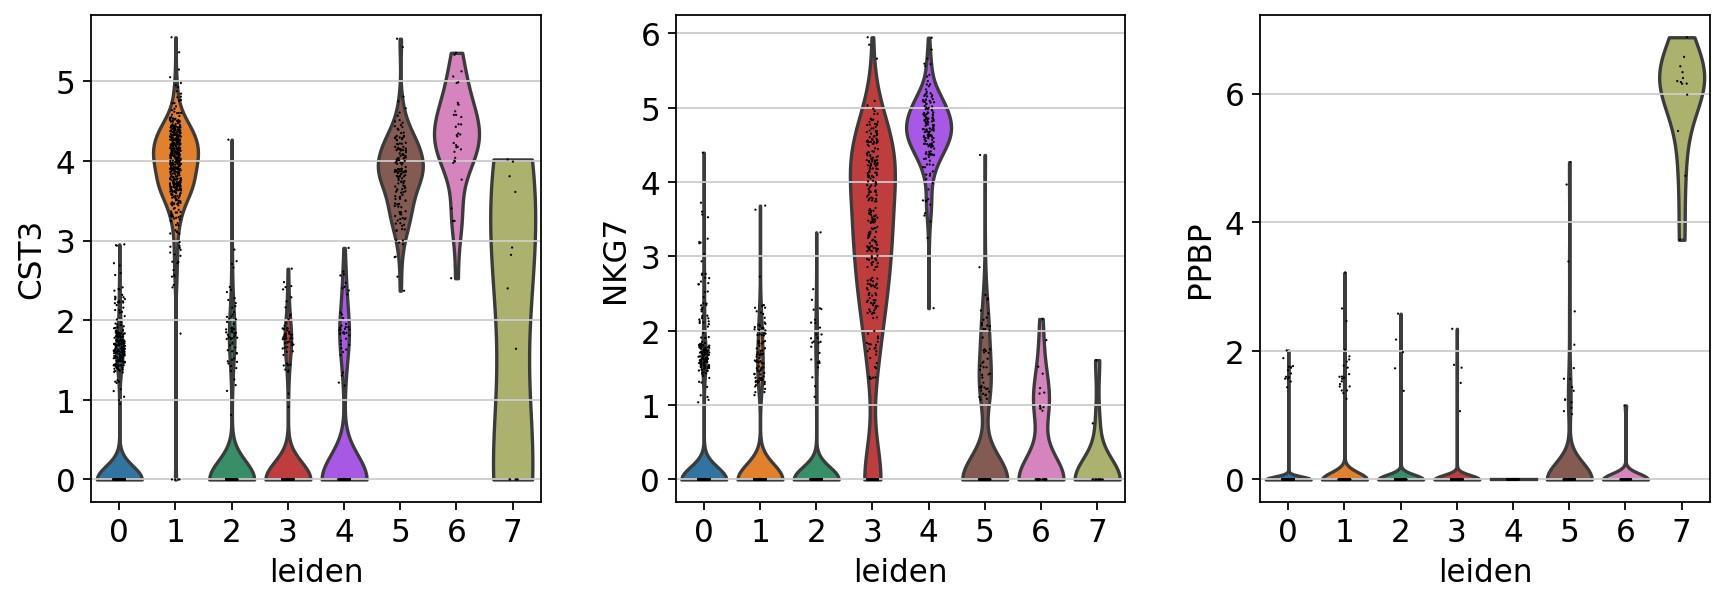

In [57]:
sc.pl.violin(adata, ['CST3', 'NKG7', 'PPBP'], groupby='leiden')

Right now we have the cluster number as the name of each column, we need to annotate the clusters i.e., assign cell type to each cluster on the basis of the marker gene expressed.

## 2.2 Cluster annotation
### 2.2.1 Manual annotation
On the basis of the differentially expressed genes identified in each cluster of cells, we can manually select one marker gene based on whose expression we can annotate a cluster as a particular cell type.
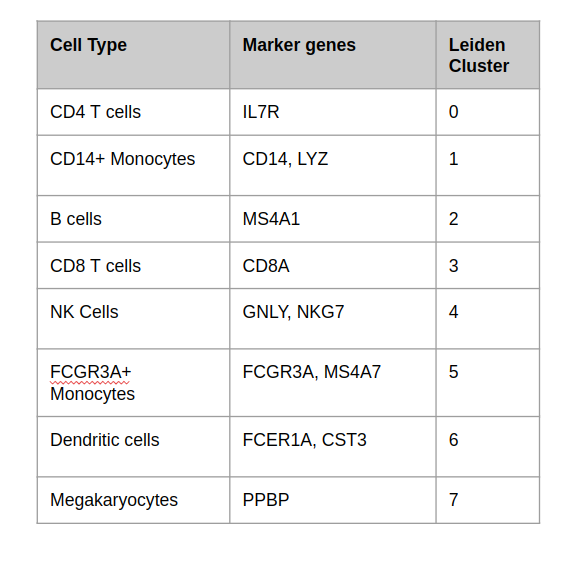


In [58]:
new_cluster_names = [
    'CD4+ T', 'CD14 Monocytes',
    'B', 'CD8+ T',
    'NK', 'FCGR3A Monocytes',
    'Dendritic', 'Megakaryocytes']
adata.rename_categories('leiden', new_cluster_names)

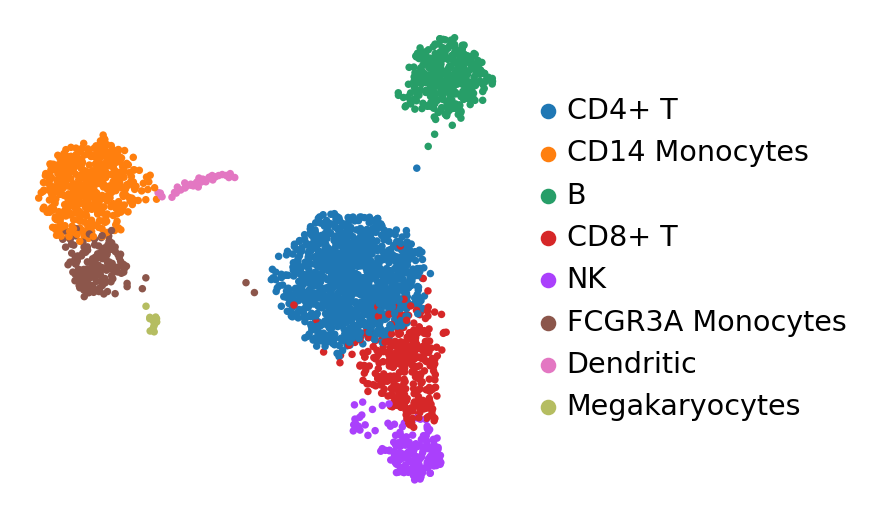

In [59]:
sc.pl.umap(adata, color='leiden', title='', frameon=False, save='.pdf')

During the course of the analysis, the AnnData object accumulated the following annotations 

In [60]:
adata

AnnData object with n_obs × n_vars = 2638 × 1838
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden'
    var: 'gene_ids', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'log1p', 'hvg', 'pca', 'neighbors', 'umap', 'leiden', 'leiden_colors', 'rank_genes_groups'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

### 2.2.2 Automated Annotation using SCSA
In addition to manual annotation, we will also be showing automated annotation of the cell clusters, since even though the former can be more accurate, it is time consuming and labor intensive and heavily rely on user expertise and thus can lead to inconsistent results.

We use SCSA, which is an automatic tool to annotate cell types from scRNA-seq data, based on a score annotation model combining differentially expressed genes (DEGs) and confidence levels of cell markers from both known and user-defined information.

In [61]:
# run the following commands on terminal
# git clone https://github.com/bioinfo-ibms-pumc/SCSA.git
# pip install pandas numpy scipy
!python3 ./scRNAseq/Workshop/SCSA/SCSA.py -d ./scRNAseq/Workshop/SCSA/whole.db -i ./scRNAseq/Workshop/SCSA/scanpy_pbmc_3k.csv -s scanpy -E -f1.5 -p 0.01 -o result -m txt 

Version V1.1 [2020/07/03]
DB load: 47347 3 3 48257 37440
Namespace(input='./scRNAseq/Workshop/SCSA/scanpy_pbmc_3k.csv', output='result', db='./scRNAseq/Workshop/SCSA/whole.db', source='scanpy', cluster='all', MarkerDB=None, foldchange=1.5, pvalue=0.01, weight=100.0, species='Human', tissue='All', outfmt='txt', celltype='normal', target='cellmarker', Gensymbol=True, norefdb=False, noprint=False, list_tissue=False)
Version V1.1 [2020/07/03]
DB load: 47347 3 3 48257 37440
load markers: 45409
############################## Cluster 0 ##############################

Cell Num: 146
Gene Num: 84
Not Zero: 469
Cluster 0 Gene number: 98
------------------------------------------------------------
Type                Cell Type           Score     Times
------------------------------------------------------------
Good                  T cell            8.8508    2.6  
------------------------------------------------------------

Go Enrichment analysis: Group1: 84 Group2: 886
>>>>>>>>>>>>>>>>>>>>>>>

Cell Num: 67
Gene Num: 40
Not Zero: 192
Cluster 3 Gene number: 41
------------------------------------------------------------
Type                Cell Type           Score     Times
------------------------------------------------------------
?                     T cell            4.5708    1.1  
------------------------------------------------------------
              (Natural killer cell)    (4.0149)
------------------------------------------------------------

Go Enrichment analysis: Group1: 40 Group2: 956
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> Function <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<
       ids  gene_num  othergene_num  p-value  q-value sig                               go_name
GO:0004252         4             16 0.006792 0.247938   -    serine-type endopeptidase activity
GO:0042289         2              3 0.014571 0.247938   -          MHC class II protein binding
GO:0031726         2              3 0.014571 0.247938   -       CCR1 chemokine receptor binding
GO:0043548         2       

       ids  gene_num  othergene_num  p-value  q-value sig                                        go_name
GO:0003723        22             41 0.001470 0.485225   -                                    RNA binding
GO:0042605         8              8 0.004625 0.711822   -                        peptide antigen binding
GO:0032395         6              7 0.022566 0.711822   -                 MHC class II receptor activity
GO:0003743         3              1 0.023065 0.711822   -         translation initiation factor activity
GO:0001085         4              4 0.046384 0.711822   - RNA polymerase II transcription factor binding

>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> Component <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<
       ids  gene_num  othergene_num  p-value  q-value sig                                                              go_name
GO:0005765        23             35 0.000129 0.020362   *                                                   lysosomal membrane
GO:0012507        12             10 0.00017

In [62]:
# importing the result file
annot_results = pd.read_csv('/home/Documents/scRNAseq/Workshop/result.csv')
annot_results

Cell Type   Z-score  Cluster
0                          T cell  8.850832        0
1     Natural killer T (NKT) cell  3.449968        0
2             Natural killer cell  2.888991        0
3                          B cell  2.360816        0
4                     CD8+ T cell  2.249771        0
...                           ...       ...      ...
1006             Limbal stem cell -0.335560        7
1007     Regulatory T (Treg) cell -0.336302        7
1008               Endocrine cell -0.338411        7
1009                    Beta cell -0.338411        7
1010                   Macrophage -0.339633        7

[1011 rows x 3 columns]

In [63]:
# SCSA outputs a results file with list of all the possible cell types(in decreasing order of probability) for a cell cluster
# to get rid of the slight manual aspect of having to look for the first cell type for each cluster,
# since this is the one the cell cluster is most likely to be (according to SCSA) 
# we made a function to pick out the first cell type ; 
def cell_annot(df):
    new_cluster_names = []
    for i in df.Cluster.unique():
        chunk = df.loc[df['Cluster'] == i]
        new_cluster_names.append(chunk.iloc[0,0])
    return new_cluster_names

In [64]:
cell_annot(annot_results)

['T cell',
 'Monocyte',
 'B cell',
 'T cell',
 'Natural killer cell',
 'Monocyte',
 'Monocyte',
 'Megakaryocyte']

In [65]:
automated_clusters = ['T-cell', 'Monocyte1','B cell', 'T Cell', 'NK Cells', 'Monocyte2', 'Monocyte3', 'Megakaryocyte']

In [66]:
bdata = adata.copy()

In [67]:
bdata

AnnData object with n_obs × n_vars = 2638 × 1838
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden'
    var: 'gene_ids', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'log1p', 'hvg', 'pca', 'neighbors', 'umap', 'leiden', 'leiden_colors', 'rank_genes_groups'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

In [68]:
bdata.rename_categories('leiden', automated_clusters)

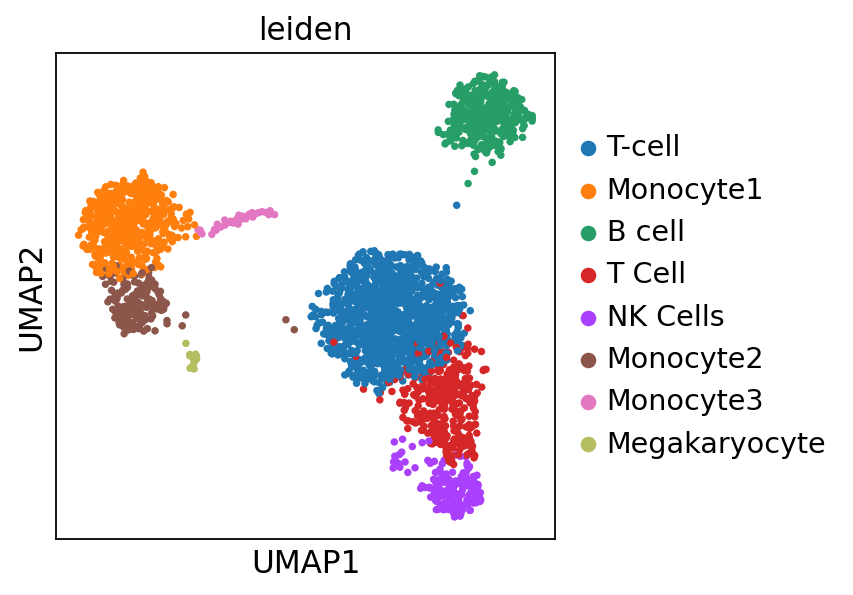

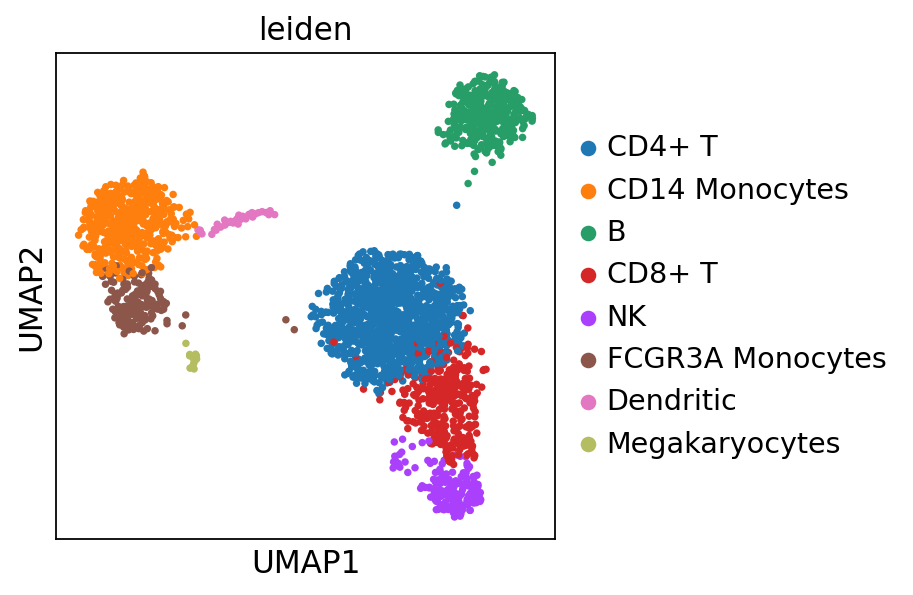

In [69]:
sc.pl.umap(bdata, color='leiden')   # automated (SCSA) cluster annotation
sc.pl.umap(adata, color='leiden')   # manual cluster annotation

**We observe that the result of the automated annotation is not as specific as manual annotation.**

In [70]:
#create a list of marker genes
marker_genes = ['IL7R', 'CD79A', 'MS4A1', 'CD8A', 'CD8B', 'LYZ', 'CD14','LGALS3', 'S100A8', 'GNLY', 'NKG7', 'KLRB1','FCGR3A', 'MS4A7', 'FCER1A', 'CST3', 'PPBP']

Now that we annotated the cell types, let us visualize the marker genes.

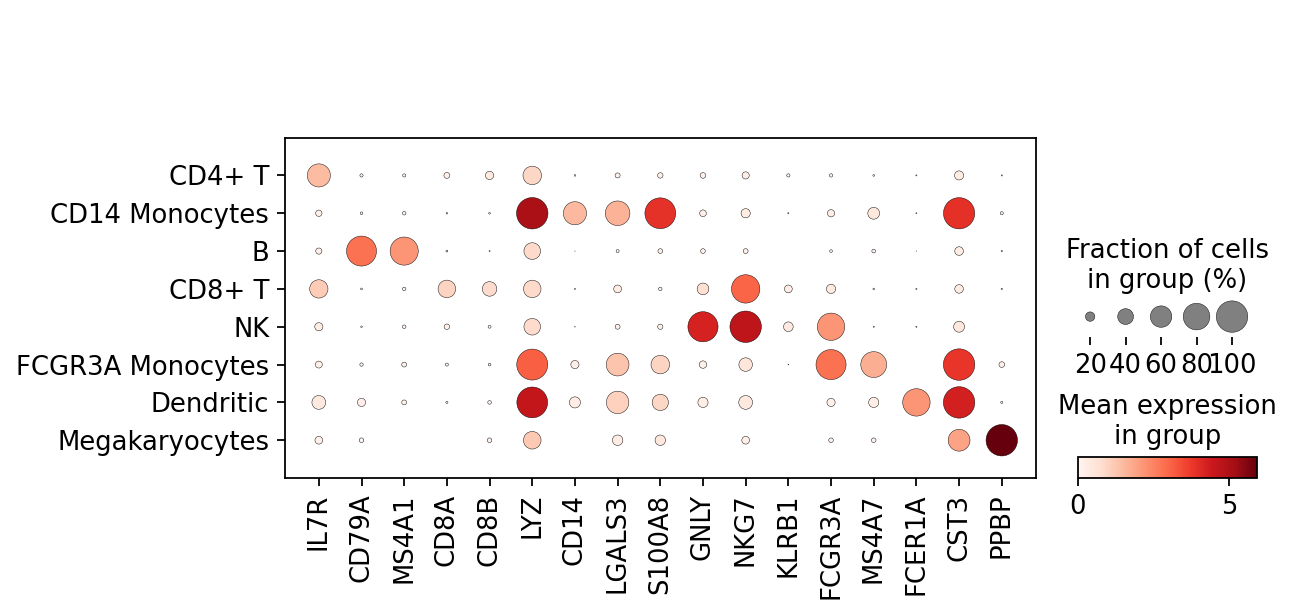

In [71]:
sc.pl.dotplot(adata, marker_genes, groupby='leiden')

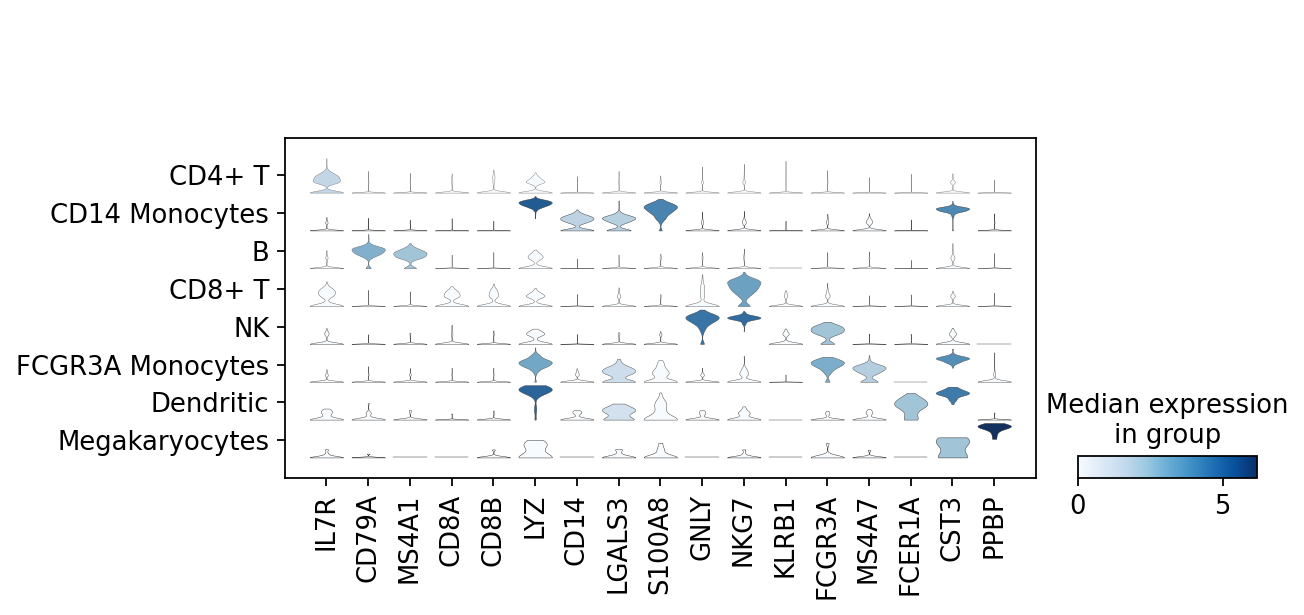

In [72]:
sc.pl.stacked_violin(adata, marker_genes, groupby='leiden', rotation=90)

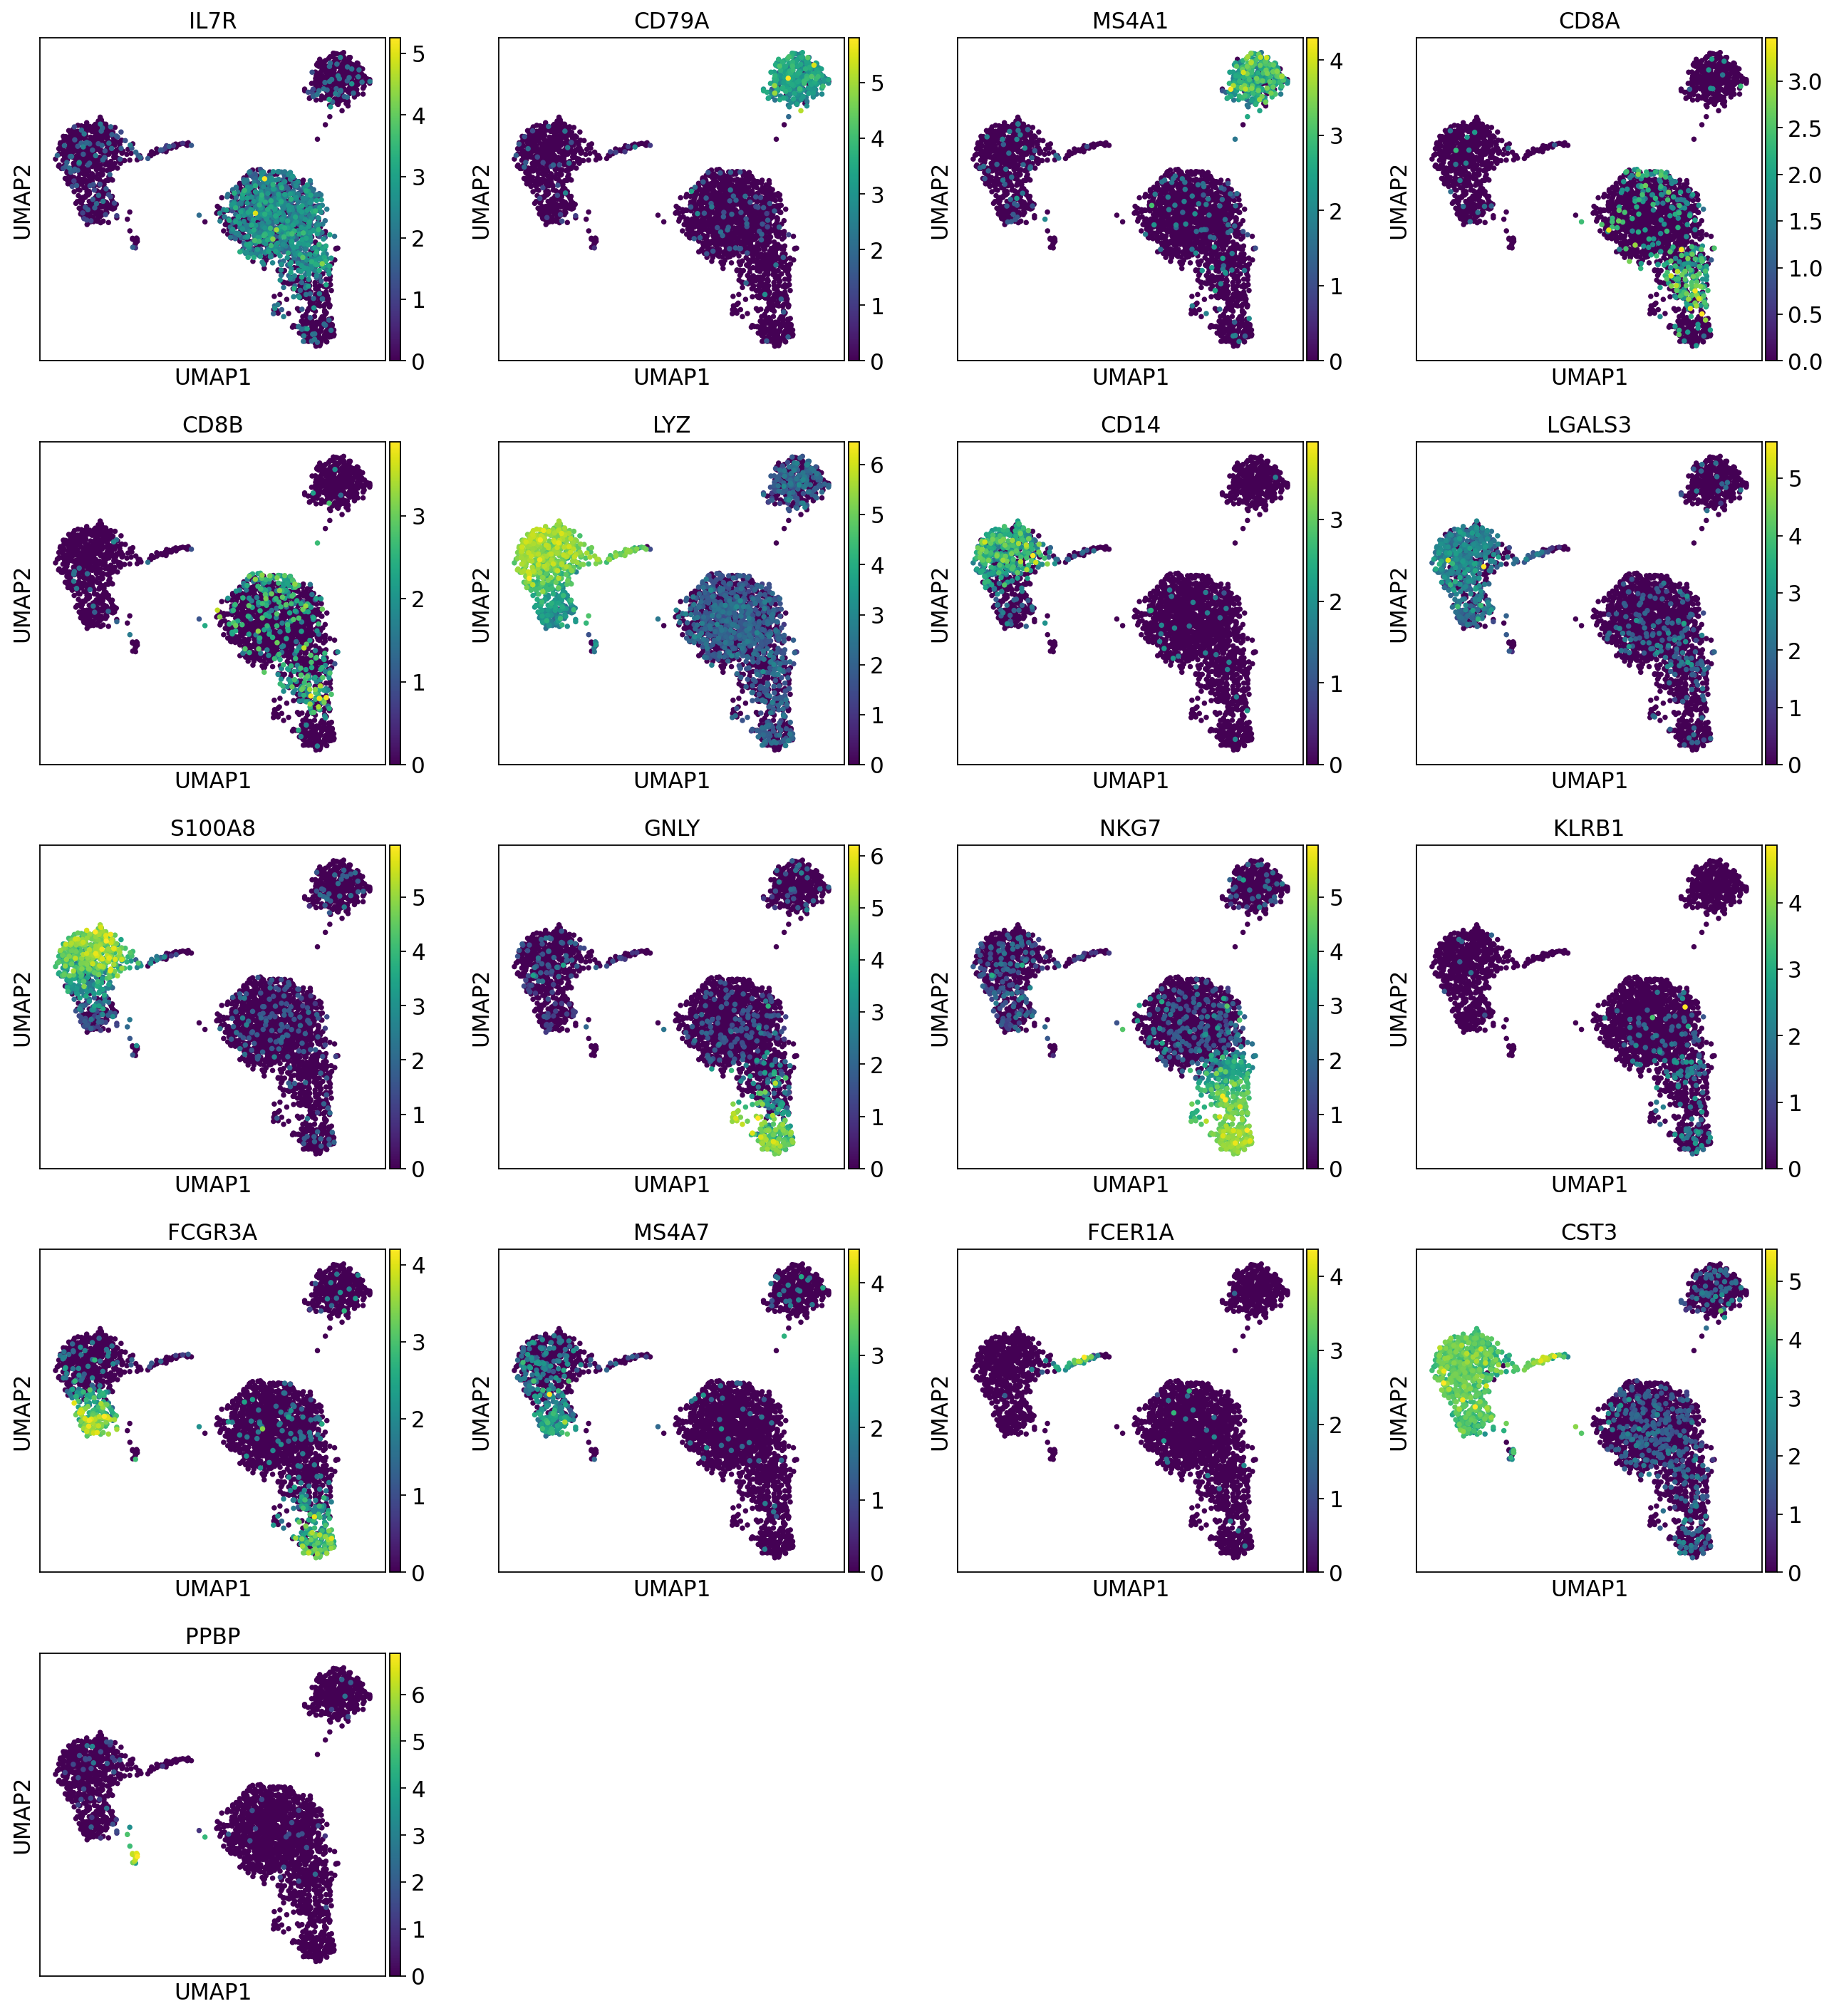

In [73]:
sc.pl.umap(adata, color=marker_genes)

At the end we look at all the expression of all the marker genes in the cell types, and we can see how the expression of these marker genes correlates with the cell cluster and hence their annotation, for example ; IL7R is a CD4+ T cell marker gene and hence the cluster it is expressed in is of the CD4+ T helper cells.